In [157]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

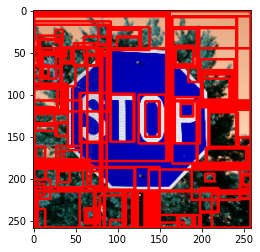

In [158]:
#Normal MSER output

# Read image 
img = cv2.imread('stop.jpg')
#converting it into gray code
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#resizing the image 
img = cv2.resize(img, (0, 0), fx = 0.1, fy = 0.1)


mser = cv2.MSER_create()

#converting the image to gray color code
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#fitting the mser algorithm on the gray image
regions, boxes = mser.detectRegions(gray)

#extracting the compnents from the mser algorithm
for box in boxes:
    x, y, w, h = box
    cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0), 2)

plt.imshow(img,'brg')
plt.show()

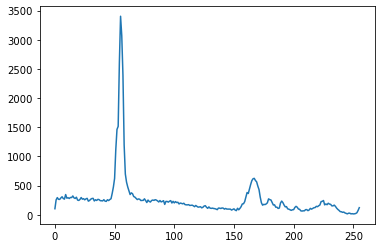

In [159]:
#histogram of the gray values of the image
histr = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(histr)

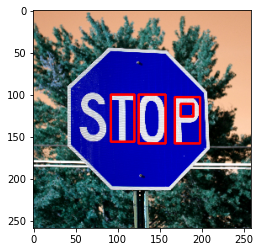

In [178]:
#Calculating the the threshold value using the Histogram fuzzy logic approximation

#two peaks in the histogram a and b are the values and the x and y the pixel values at which a and b value occur
flag = 0
a= max(histr)
b = -1

for index,i in enumerate(histr):
    if(i==a):
        x1=index

for i in range(len(histr)-1):
    if(histr[i] != a):
        if(histr[i] > histr[i+1] and histr[i-1] < histr[i]):
            if(max(b,histr[i]) > b):
                x2 = i
            b = max(b,histr[i])
        
a = int(a) 
b = int (b)

#intersection point of both the lines is the threshold value
x  = (a*x2 + b*x1) / (a+b)
y = b/(x2-x1)  * (x - x1)

#point of dividing is to make sure that the value remains below 100
if(x > 100):
    threshold_value = int(x/2)
else:
    threshold_value = int(x)

img = cv2.imread('stop.jpg')
#converting it into gray code
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#resizing the image 
img = cv2.resize(img, (0, 0), fx = 0.1, fy = 0.1)


mser = cv2.MSER_create(delta = threshold_value )

#converting the image to gray color code
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#fitting the mser algorithm on the gray image
regions, boxes = mser.detectRegions(gray)

#extracting the compnents from the mser algorithm
for box in boxes:
    x, y, w, h = box
    cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0), 2)

plt.imshow(img,'brg')
plt.show()

